**CLASSIFYING MNIST DATA USING CONVOLUTIONAL NEURAL NETWORK**

In [37]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [39]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [40]:
X_train[0] # First image of the training dataset 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
#Print the image label
y_train[0]

5

In [42]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)
print(X_train)
print(X_test)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [43]:
#One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [44]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [45]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.6599 - accuracy: 0.9177 - val_loss: 0.0800 - val_accuracy: 0.9762
Epoch 2/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0807 - val_accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0832 - val_accuracy: 0.9777


In [47]:
predictions = model.predict(X_test[:4])
predictions

array([[1.5337314e-12, 3.0154333e-17, 2.2365568e-11, 4.8841717e-09,
        1.3353930e-17, 6.6997943e-15, 1.0310799e-20, 1.0000000e+00,
        2.9148147e-13, 8.2648305e-11],
       [8.6375096e-08, 5.2010501e-12, 9.9999988e-01, 9.3223010e-13,
        7.9994849e-13, 2.1412519e-15, 1.4050894e-08, 4.8415139e-17,
        4.4367713e-12, 1.0664454e-15],
       [6.5079611e-08, 9.9988031e-01, 3.2314872e-06, 8.3472864e-09,
        1.1369408e-04, 2.3623707e-07, 8.1414120e-09, 1.1465415e-07,
        2.2720139e-06, 2.3620561e-10],
       [1.0000000e+00, 8.4838283e-13, 1.9059283e-09, 1.9438083e-13,
        7.9790558e-12, 2.9444946e-11, 5.4668970e-08, 3.1896094e-12,
        1.1883969e-08, 3.1796116e-08]], dtype=float32)

In [48]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:10])

[7 2 1 0]
[7 2 1 0 4 1 4 9 5 9]


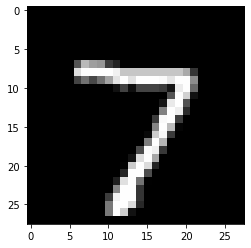

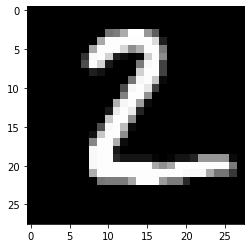

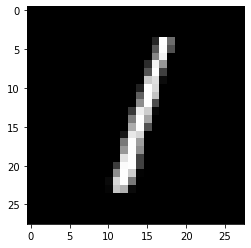

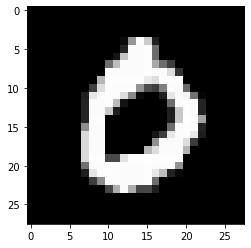

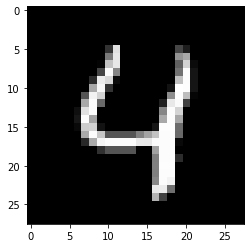

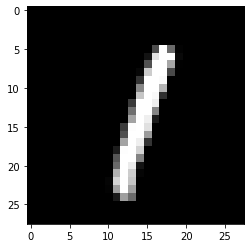

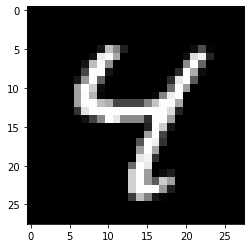

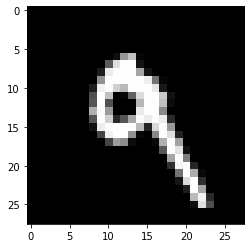

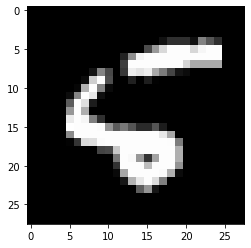

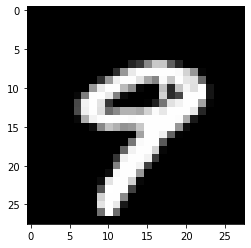

In [49]:
#Show the first 4 images as pictures 
for i in range(0,10):   
   image = X_test[i]   
   image = np.array(image, dtype='float')   
   pixels = image.reshape((28,28))  
   plt.imshow(pixels, cmap='gray')   
   plt.show()

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

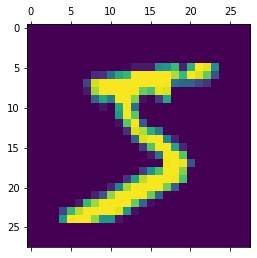

In [52]:
plt.matshow(X_train[0])

**SCALLING THE IMAGE DATA**

In [53]:
X_train = X_train / 255
X_test = X_test / 255

In [54]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [55]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**FITTING THE MODEL**

In [56]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,28*28), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7170 - accuracy: 0.8126
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3091 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2748 - accuracy: 0.9219
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9253


In [57]:
model.evaluate(X_test_flatten, Y_test)

313/313 [==============================] - 0s 905us/step - loss: 0.2659 - accuracy: 0.9262


[0.26585957407951355, 0.9261999726295471]

In [58]:
model.predict(X_test_flatten)

array([[4.46590320e-06, 7.36937594e-11, 1.98538473e-05, ...,
        9.93188620e-01, 2.66147272e-05, 4.34195972e-04],
       [3.50167480e-04, 4.56250609e-06, 9.89526987e-01, ...,
        4.09670450e-16, 1.00414582e-04, 8.65356940e-13],
       [1.66360633e-06, 9.78817046e-01, 1.12733375e-02, ...,
        7.92744628e-04, 3.61138303e-03, 3.27518064e-04],
       ...,
       [1.13387406e-08, 1.67899490e-08, 4.85203145e-06, ...,
        1.03910360e-03, 4.27213591e-03, 1.45570319e-02],
       [2.32744526e-07, 4.69167901e-07, 3.84899295e-07, ...,
        1.29721101e-07, 5.97748300e-03, 2.75781673e-07],
       [1.97304280e-06, 2.35314155e-13, 3.69449990e-05, ...,
        5.62660075e-12, 6.53293810e-08, 1.48518045e-10]], dtype=float32)

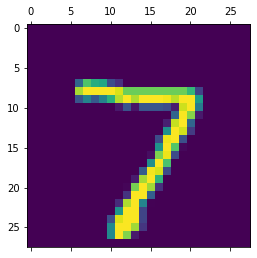

In [59]:
plt.matshow(X_test[0])

In [60]:
Y_predicted=model.predict(X_test_flatten)
Y_predicted[0]

array([4.4659032e-06, 7.3693759e-11, 1.9853847e-05, 6.2799831e-03,
       7.1137129e-07, 4.5634482e-05, 3.8371814e-10, 9.9318862e-01,
       2.6614727e-05, 4.3419597e-04], dtype=float32)

In [61]:
np.argmax(Y_predicted[0]) #printing the value

7

In [62]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [63]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    6,    3,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    9,  922,   17,    9,    5,   13,   10,   39,    3],
       [   2,    0,   18,  925,    1,   28,    2,   10,   17,    7],
       [   2,    1,    2,    2,  919,    0,   11,    4,    7,   34],
       [   7,    2,    3,   34,    7,  791,   13,    3,   26,    6],
       [  11,    3,    7,    1,    7,   17,  908,    2,    2,    0],
       [   1,    6,   24,    6,    5,    1,    0,  954,    2,   29],
       [   5,    8,    6,   27,    9,   35,    9,   10,  857,    8],
       [  10,    7,    1,   13,   31,    8,    0,   22,    6,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

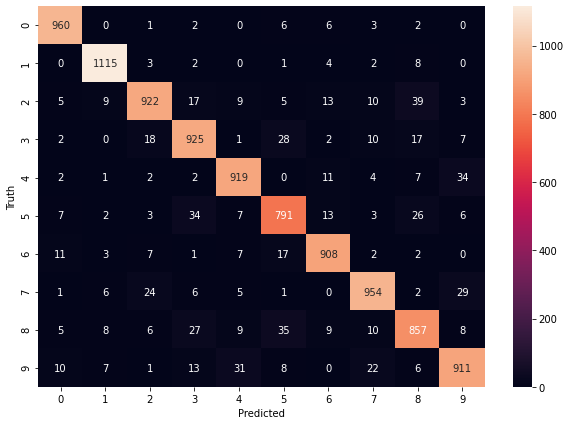

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,28*28), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4552 - accuracy: 0.8698
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1331 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0487 - accuracy: 0.9857


In [66]:
model.save('final_model.h5')

In [67]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('/content/ezgif.com-gif-maker.png', grayscale=True, target_size=(28, 28))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(28*28,)
# prepare pixel data
img = img.astype('float32')
#img = tf.image.rgb_to_grayscale(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0
model = load_model('final_model.h5')
digit = model.predict(img)
print(digit[0])
print('\n')
print('The Recognized number is')
np.argmax(digit[0]) 

[4.2684181e-07 6.8658852e-09 1.0947546e-05 3.4709359e-04 1.5715831e-09
 1.2721523e-07 2.6374841e-13 9.9963629e-01 4.8146057e-07 4.6656151e-06]


The Recognized number is


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7